<a href="https://colab.research.google.com/github/currencyfxjle/PySpark_MachineLearning/blob/main/PySpark_MachineLearning_JoseLizarraga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Paso 1: Importar Librerías y Cargar los Datos**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Carga los datos
df = pd.read_csv('/content/MonterreyPollutionData.csv', encoding='ISO-8859-1')


**Paso 2: Preprocesamiento y Análisis Exploratorio**

             Month          Day      WeekDay         Hour           CO  \
count  3859.000000  3859.000000  3859.000000  3859.000000  3859.000000   
mean      4.820679    15.764447     4.075926    12.037834     1.800622   
std       2.835288     9.157213     1.973040     6.869488     0.872034   
min       1.000000     1.000000     1.000000     0.000000     0.290000   
25%       2.000000     8.000000     2.000000     6.000000     1.130000   
50%       4.000000    16.000000     4.000000    13.000000     1.760000   
75%       7.000000    24.000000     6.000000    18.000000     2.220000   
max      11.000000    31.000000     7.000000    23.000000     8.560000   

                NO          NO2          NOX           O3         PM10  \
count  3859.000000  3859.000000  3859.000000  3859.000000  3859.000000   
mean     13.503654    17.539285    30.973257    22.658720    86.049495   
std      26.856245    13.301007    36.090498    16.510561    49.008874   
min       2.300000     0.400000     3

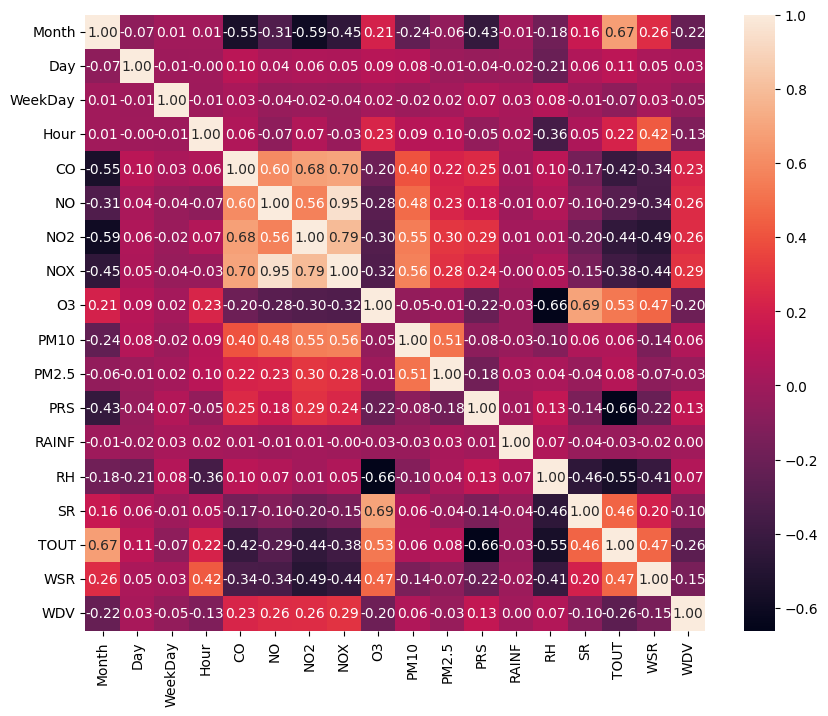

In [3]:
# Seleccionamos solo las columnas de interés, asumiendo que 'Date' y 'DayWeek' se excluyen inicialmente
df = df.drop(['Date', 'DayWeek'], axis=1)

# Análisis descriptivo
print(df.describe())

# Análisis de correlación
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()


**Paso 3: Preparación de los Datos para Modelado**

In [4]:
# Asumiendo que 'PM10' es la variable objetivo y queremos usar todas las demás como predictores
X = df.drop(['PM10'], axis=1).select_dtypes(include=[np.number])  # Selecciona solo datos numéricos
y = df['PM10']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Paso 4: Modelo de Regresión Lineal**

In [5]:
# Regresión Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)

# Evaluación
print("Regresión Lineal - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Regresión Lineal - R^2:", r2_score(y_test, y_pred))


Regresión Lineal - RMSE: 32.80608678403652
Regresión Lineal - R^2: 0.5796791919125708


**Paso 5: Modelo de Regresión - Random Forest**

In [6]:
# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)
y_pred_rf = rf_reg.predict(X_test_scaled)

# Evaluación
print("Random Forest - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest - R^2:", r2_score(y_test, y_pred_rf))


Random Forest - RMSE: 30.675263726058045
Random Forest - R^2: 0.6325073631220198


**Paso 6: Preparación para Modelos de Clasificación**

In [7]:
# Transformar 'PM10' en variable categórica para clasificación
df['PM10_Cat'] = pd.cut(df['PM10'], bins=[-np.inf, 50, np.inf], labels=['Baja', 'Alta'])
y_clas = df['PM10_Cat']

# Codificación One-Hot para variables categóricas si es necesario
# X = pd.get_dummies(X, drop_first=True)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_clas, test_size=0.2, random_state=42)

# No es necesario escalar nuevamente ya que X_train_scaled y X_test_scaled ya están escalados


**Paso 7: Modelo de Clasificación - Random Forest**

In [8]:
# Random Forest Classifier
rf_clas = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clas.fit(X_train_scaled, y_train_c)
y_pred_clas = rf_clas.predict(X_test_scaled)

# Evaluación
print("Accuracy:", accuracy_score(y_test_c, y_pred_clas))
print(classification_report(y_test_c, y_pred_clas))


Accuracy: 0.8743523316062176
              precision    recall  f1-score   support

        Alta       0.90      0.96      0.93       640
        Baja       0.69      0.48      0.57       132

    accuracy                           0.87       772
   macro avg       0.80      0.72      0.75       772
weighted avg       0.86      0.87      0.86       772



**PySpark Machine Learning**

In [9]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=bed78a43b4e2dc9d75cd78234a62e1f00d899599f8006d4efa8296647ff4e0cb
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [10]:
# Importes necesarios
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

# Inicia una sesión de Spark
spark = SparkSession.builder.appName("MonterreyPollutionAnalysis").getOrCreate()

# Carga los datos
df = spark.read.csv("/content/MonterreyPollutionData.csv", header=True, inferSchema=True)

# Renombra la columna para evitar el problema con el punto en el nombre
df = df.withColumnRenamed("PM2.5", "PM2_5")

# Verifica los tipos de datos y ajusta según sea necesario
df.printSchema()

# Asegurándonos de que todas las columnas seleccionadas para el modelo sean numéricas
df = df.select(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2_5', 'PRS', 'RAINF', 'RH', 'SR', 'TOUT', 'WSR', 'WDV'])

# Define las columnas de características y la columna objetivo para el modelado
featureCols = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM2_5', 'PRS', 'RAINF', 'RH', 'SR', 'TOUT', 'WSR', 'WDV']
assembler = VectorAssembler(inputCols=featureCols, outputCol="features")
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

# Modelo de regresión lineal
lr = LinearRegression(featuresCol="scaledFeatures", labelCol="PM10")

# Pipeline que incluye vectorización, escalado y regresión lineal
pipeline = Pipeline(stages=[assembler, scaler, lr])

# Divide los datos en conjuntos de entrenamiento y prueba
trainData, testData = df.randomSplit([0.7, 0.3], seed=42)

# Entrenamiento del modelo con los datos de entrenamiento
model = pipeline.fit(trainData)

# Predicciones con el conjunto de prueba
predictions = model.transform(testData)

# Evaluación del modelo con RMSE
evaluator_rmse = RegressionEvaluator(labelCol="PM10", predictionCol="prediction", metricName="rmse")
rmse = evaluator_rmse.evaluate(predictions)
print("RMSE: %g" % rmse)

# Evaluación del modelo con R^2
evaluator_r2 = RegressionEvaluator(labelCol="PM10", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print("R2: %g" % r2)


root
 |-- Date: string (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- DayWeek: string (nullable = true)
 |-- WeekDay: integer (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- CO: double (nullable = true)
 |-- NO: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- NOX: double (nullable = true)
 |-- O3: integer (nullable = true)
 |-- PM10: integer (nullable = true)
 |-- PM2_5: integer (nullable = true)
 |-- PRS: double (nullable = true)
 |-- RAINF: double (nullable = true)
 |-- RH: integer (nullable = true)
 |-- SR: double (nullable = true)
 |-- TOUT: double (nullable = true)
 |-- WSR: double (nullable = true)
 |-- WDV: integer (nullable = true)

RMSE: 32.7753
R2: 0.569305


Correlación entre PM10 y CO: 0.39680545677385687
Correlación entre PM10 y NO: 0.4810582590173799
Correlación entre PM10 y NO2: 0.550360658945529
Correlación entre PM10 y NOX: 0.561353016650637
Correlación entre PM10 y O3: -0.046892797324559386
Correlación entre PM10 y PM2_5: 0.5119890672986728
Correlación entre PM10 y PRS: -0.07659701332290363
Correlación entre PM10 y RAINF: -0.025532388165213575
Correlación entre PM10 y RH: -0.10313336817644692
Correlación entre PM10 y SR: 0.055219858292111824
Correlación entre PM10 y TOUT: 0.05994127919050274
Correlación entre PM10 y WSR: -0.13963836787238856
Correlación entre PM10 y WDV: 0.06329837214486918


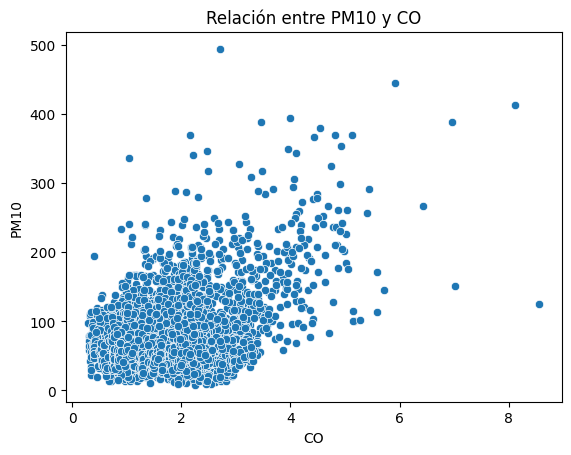

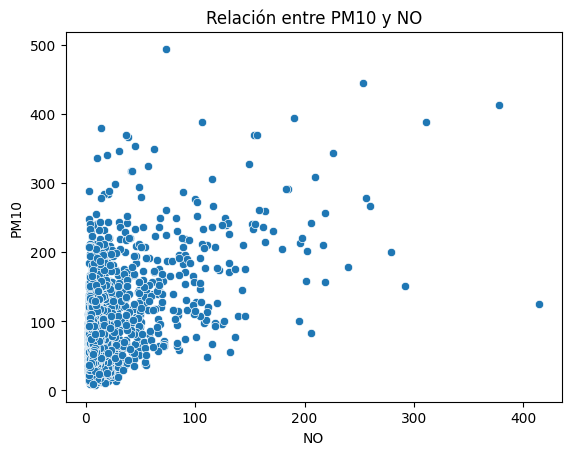

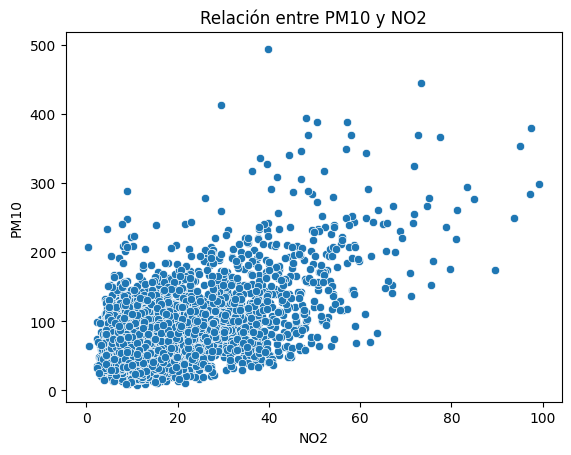

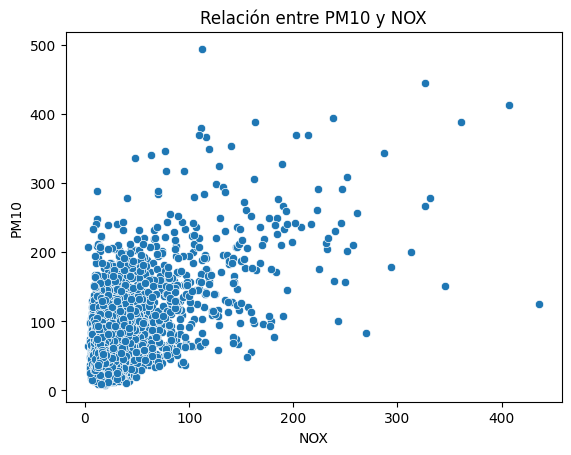

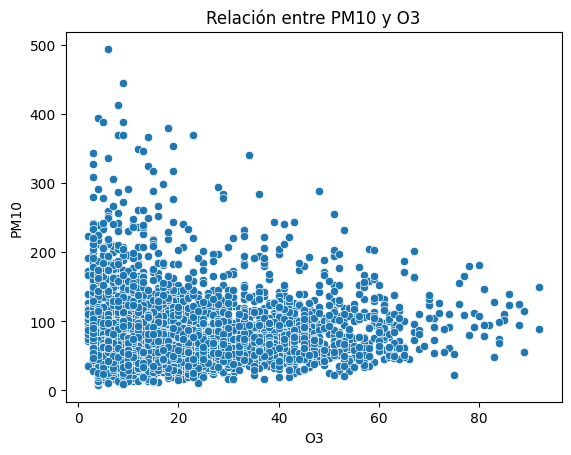

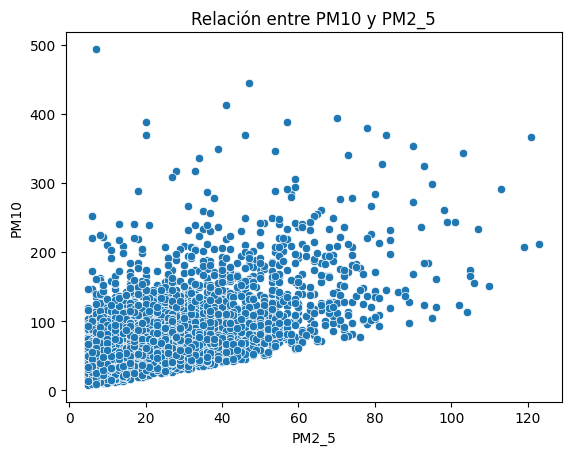

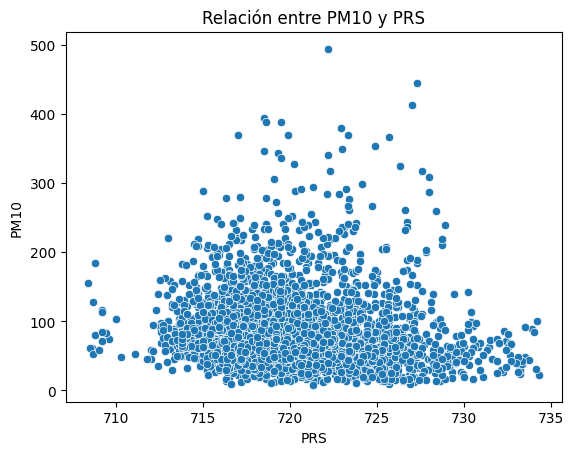

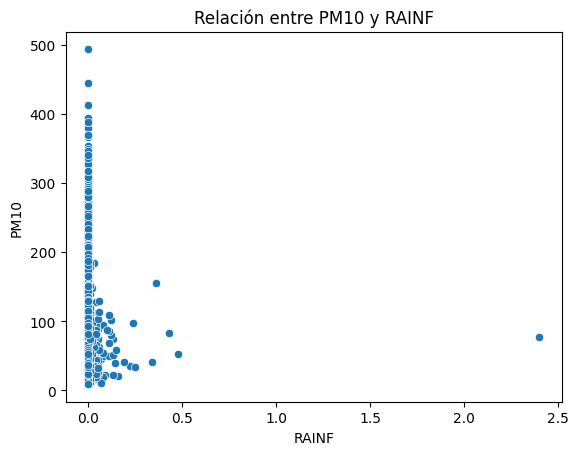

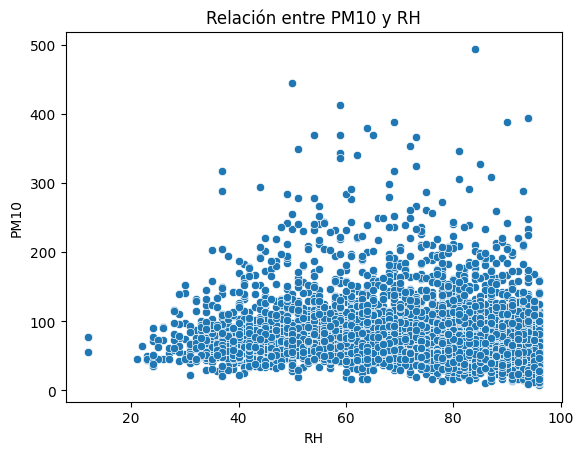

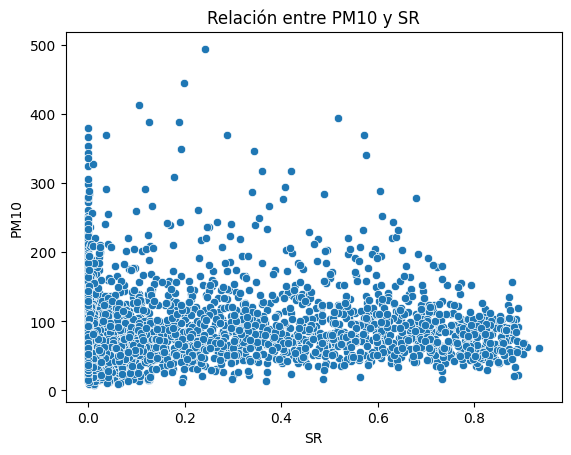

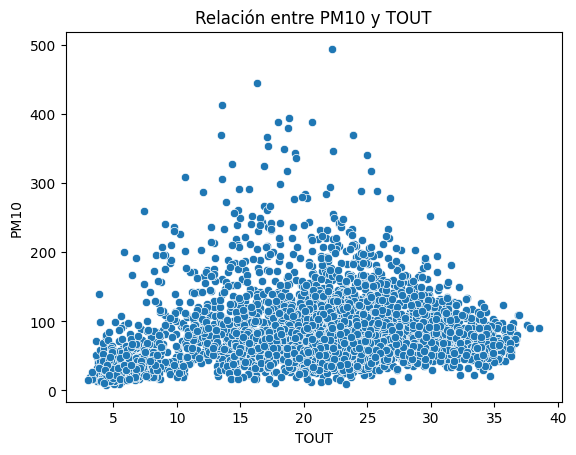

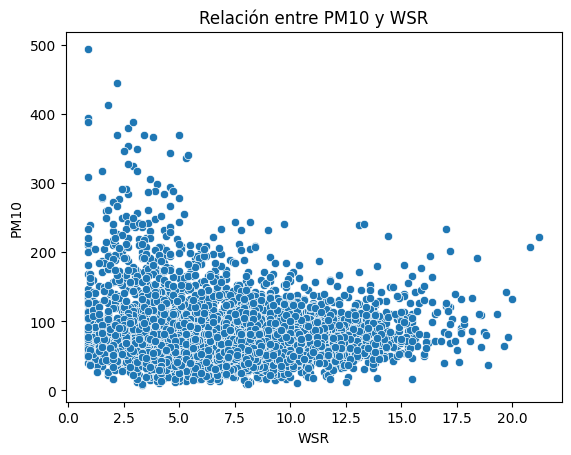

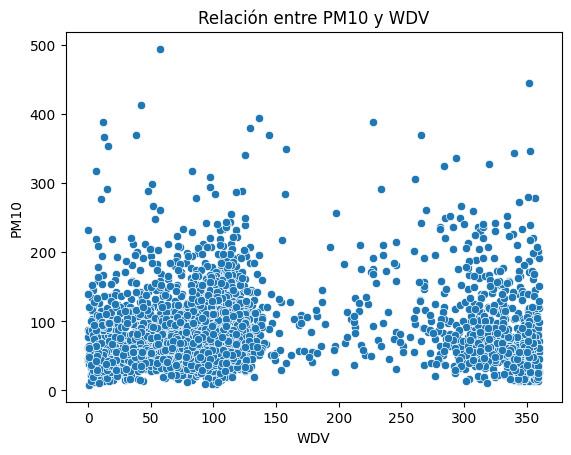

Area Under ROC: 0.8684157201514408


In [11]:
from pyspark.sql.functions import corr
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Analiza la correlación entre 'PM10' y otras variables
for col in featureCols:
    print(f"Correlación entre PM10 y {col}: {df.stat.corr('PM10', col)}")

# Para visualizaciones: Convierte a Pandas DataFrame (Cuidado con el tamaño de los datos)
pandas_df = df.select(featureCols + ['PM10']).toPandas()

# Visualización con Seaborn o Matplotlib (ejemplo simple)
import seaborn as sns
import matplotlib.pyplot as plt

for col in featureCols:
    sns.scatterplot(x=col, y='PM10', data=pandas_df)
    plt.title(f'Relación entre PM10 y {col}')
    plt.show()

# Transformación de 'PM10' para clasificación (ejemplo simple)
df = df.withColumn('PM10_Class', (df['PM10'] > 50).cast('int'))

# Define un nuevo assembler incluyendo las columnas de características originales
assembler_cls = VectorAssembler(inputCols=featureCols, outputCol="features")

# Modelo de clasificación: Random Forest Classifier
rf_cls = RandomForestClassifier(featuresCol="features", labelCol="PM10_Class")

# Pipeline para clasificación
pipeline_cls = Pipeline(stages=[assembler_cls, scaler, rf_cls])

# Divide los datos para clasificación
trainData_cls, testData_cls = df.randomSplit([0.7, 0.3], seed=42)

# Entrenamiento del modelo de clasificación
model_cls = pipeline_cls.fit(trainData_cls)

# Predicciones con el modelo de clasificación
predictions_cls = model_cls.transform(testData_cls)

# Evaluación del modelo de clasificación
evaluator_cls = BinaryClassificationEvaluator(labelCol="PM10_Class", metricName="areaUnderROC")
auc = evaluator_cls.evaluate(predictions_cls)
print(f"Area Under ROC: {auc}")

# Si PM10_Class tiene más de dos clases, usa MulticlassClassificationEvaluator


**# Seleccionamos solo las columnas con las top 5 correlaciones y PM10 para la regresión**

In [12]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator, BinaryClassificationEvaluator

# Inicia una sesión de Spark si no existe una ya activa
spark = SparkSession.builder.appName("MonterreyPollutionAnalysis").getOrCreate()

# Carga los datos y realiza las transformaciones iniciales
df = spark.read.csv("/content/MonterreyPollutionData.csv", header=True, inferSchema=True)
df = df.withColumnRenamed("PM2.5", "PM2_5")

# Seleccionamos solo las columnas con las top 5 correlaciones y PM10 para la regresión
featureColsTop5 = ['NOX', 'NO2', 'PM2_5', 'NO', 'CO']
df = df.select(featureColsTop5 + ['PM10'])

# Define las columnas de características y la columna objetivo para el modelado de regresión
assembler = VectorAssembler(inputCols=featureColsTop5, outputCol="features")
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

# Modelo de regresión lineal usando solo las top 5 características
lr = LinearRegression(featuresCol="scaledFeatures", labelCol="PM10")

# Pipeline que incluye vectorización, escalado y regresión lineal
pipeline = Pipeline(stages=[assembler, scaler, lr])

# Divide los datos en conjuntos de entrenamiento y prueba
trainData, testData = df.randomSplit([0.7, 0.3], seed=42)

# Entrenamiento del modelo de regresión con los datos de entrenamiento
model = pipeline.fit(trainData)

# Predicciones con el conjunto de prueba
predictions = model.transform(testData)

# Evaluación del modelo de regresión con RMSE y R^2
evaluator_rmse = RegressionEvaluator(labelCol="PM10", predictionCol="prediction", metricName="rmse")
rmse = evaluator_rmse.evaluate(predictions)
evaluator_r2 = RegressionEvaluator(labelCol="PM10", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print("RMSE: %g" % rmse)
print("R2: %g" % r2)


RMSE: 34.7358
R2: 0.463747


In [13]:
# Transformación de 'PM10' para clasificación, asumiendo un umbral
df = df.withColumn('PM10_Class', (df['PM10'] > 50).cast('int'))

# Pipeline para clasificación usando RandomForest y las mismas top 5 características
rf_cls = RandomForestClassifier(featuresCol="scaledFeatures", labelCol="PM10_Class")
pipeline_cls = Pipeline(stages=[assembler, scaler, rf_cls])

# Divide los datos para clasificación
trainData_cls, testData_cls = df.randomSplit([0.7, 0.3], seed=42)

# Entrenamiento del modelo de clasificación
model_cls = pipeline_cls.fit(trainData_cls)

# Predicciones con el modelo de clasificación
predictions_cls = model_cls.transform(testData_cls)

# Evaluación del modelo de clasificación con el área bajo la curva ROC
evaluator_cls = BinaryClassificationEvaluator(labelCol="PM10_Class", metricName="areaUnderROC")
auc = evaluator_cls.evaluate(predictions_cls)
print(f"Area Under ROC: {auc}")


Area Under ROC: 0.7932517586551335
